In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import itertools
import pandas as pd
import math
import random
import os
from os import listdir
from os.path import isfile, join

In [3]:
#Read the index dictionary
#Revert the index 
index_name = '/home/samuel/Documents/PhD/Quasispecies/Data/seqs_index.dict'

index_dict = {}

with open(index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])
        
WD = '/home/samuel/Documents/PhD/Quasispecies/Data/Sequences_filtered/'
mypath = WD

#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        #print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        #print(f'step={step} for t={t}')
    
    file_name = WD + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab
df = {}
#Upload data to DataFrame
df[43] = pd.DataFrame([])
df[30] = pd.DataFrame([])
df[43] = pd.DataFrame.from_dict(data_dict[43])
df[30] = pd.DataFrame.from_dict(data_dict[30])
df[43] = df[43].fillna(0)
df[30] = df[30].fillna(0)

temps = [30,43]

cmap = {30:'b', 43:'r'}

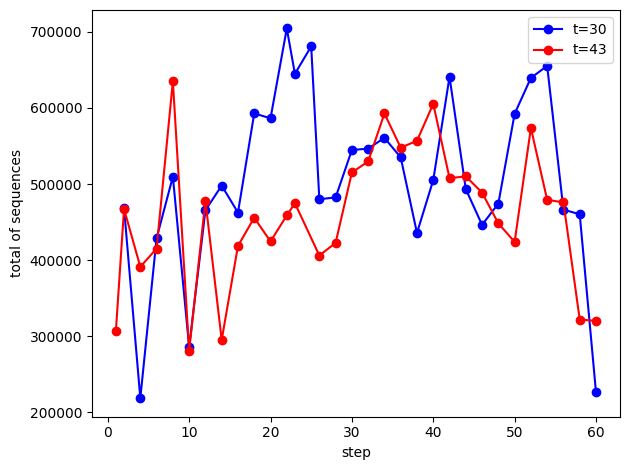

In [5]:
# Get the number of sequences obtained in each step
for t in temps:
    datadict = {}
    L = df[t].columns.tolist()
    L.sort()
    for element in L:
        datadict[element] = int(df[t][element].sum())
    
    dataf = pd.DataFrame.from_dict(datadict, orient='index', columns=['Total'])
    #dataf.sort_values('Total', ascending=True)
    plt.plot(dataf.index.tolist(), dataf['Total'].tolist(), 'o-', label=f't={t}', c=cmap[t])

    
plt.ylabel('total of sequences')
plt.xlabel('step')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig(f'./pics_results/total_sequences.png')

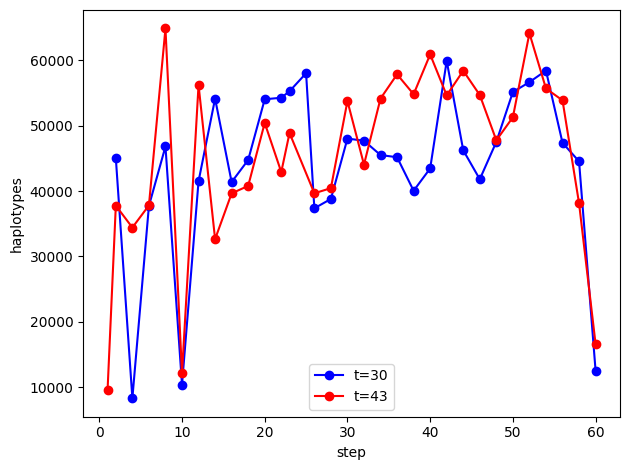

In [6]:
# Get the number of unique genotipes obtained in each step
for t in temps:
    datadict = {}
    L = df[t].columns.tolist()
    L.sort()
    for element in L:
        df_x = df[t][element]
        datadict[element] = int(len(df[t][element].to_numpy().nonzero()[0]))
    
    dataf = pd.DataFrame.from_dict(datadict, orient='index', columns=['Total'])
    #dataf.sort_values('Total', ascending=True)
    plt.plot(dataf.index.tolist(), dataf['Total'].tolist(), 'o-', label=f't={t}', c=cmap[t])

    
plt.ylabel('haplotypes')
plt.xlabel('step')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig(f'./pics_results/haplotypes_step.png')

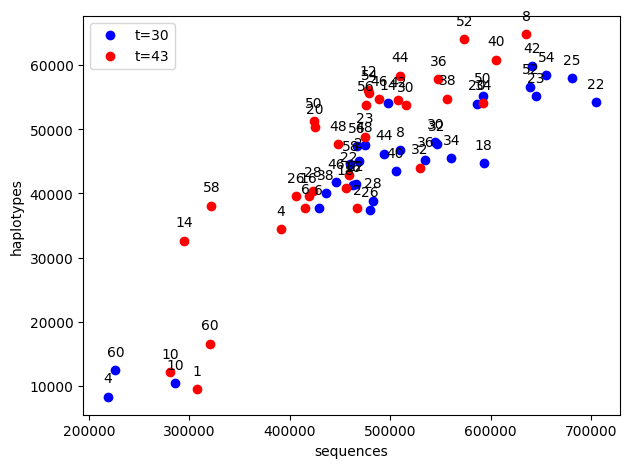

In [7]:
# number of haplotypes vs. number of sequences

for t in temps:
    datadict_htyp = {}
    datadict_nseq = {}
    L = df[t].columns.tolist()
    L.sort()
    for element in L:
        #df_x = df[t][element]
        datadict_htyp[element] = int(len(df[t][element].to_numpy().nonzero()[0]))
        datadict_nseq[element] = int(df[t][element].sum())
    
    dataf_htyp = pd.DataFrame.from_dict(datadict_htyp, orient='index', columns=['Total'])
    dataf_nseq = pd.DataFrame.from_dict(datadict_nseq, orient='index', columns=['Total'])
    #dataf.sort_values('Total', ascending=True)
    xs = dataf_nseq['Total'].tolist()
    ys = dataf_htyp['Total'].tolist()
    plt.plot(xs, ys, 'o', label=f't={t}', c=cmap[t])
    i=0
    for x,y in zip(xs,ys):

        label = "{:d}".format(L[i])

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center
        i +=1
plt.ylabel('haplotypes')
plt.xlabel('sequences')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig(f'./pics_results/haplotypes_per_sequences.png')


In [21]:
#How many new haplotypes we get in a step

t=43

df_t = df[t]

steps = list(df_t.columns)
steps.sort()

haplo_total = []
n = []

for step in steps:
    print(f'step={step}')
    df_x = df_t[step][df_t[step]!=0.0]
    instant_haplos = list(df_x.index)
    for h in instant_haplos:
        if h not in haplo_total:
            haplo_total.append(h)
    n.append(len(haplo_total))




step=1
step=2
step=4
step=6
step=8
step=10
step=12
step=14
step=16
step=18
step=20
step=22
step=23
step=26
step=28
step=30
step=32
step=34
step=36
step=38
step=40
step=42
step=44


KeyboardInterrupt: 

In [18]:
import pickle

fOut = '/home/samuel/Documents/PhD/Quasispecies/Quasispecies_evolution/01-overlapping_vector/computes_results/'

with open(fOut+f'nhaplo_{t}.pickle', 'wb') as r:
    pickle.dump(n, r)

Text(0, 0.5, 'number of haplotypes explored')

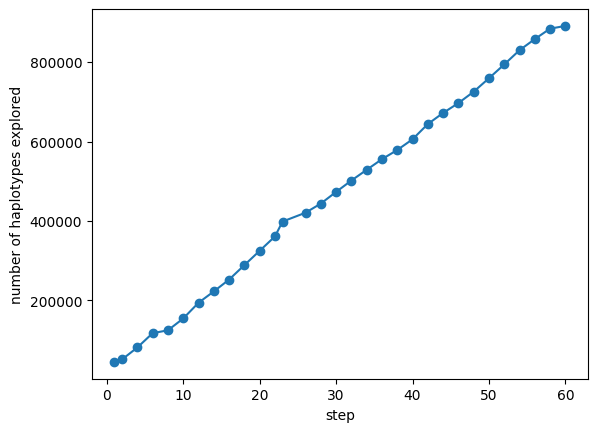

In [20]:
plt.figure()
plt.plot(L,n)
plt.scatter(L,n)

plt.xlabel('step')
plt.ylabel('number of haplotypes explored')